## 1. Vấn đề phụ thuộc xa
Một điểm nổi bật của RNN chính là ý tưởng kết nối các thông tin phía trước để dự đoán cho hiện tại. Việc này tương tự như ta sử dụng các cảnh trước của bộ phim để hiểu được cảnh hiện thời. Nếu mà RNN có thể làm được việc đó thì chúng sẽ cực kì hữu dụng, tuy nhiên liệu chúng có thể làm được không? Câu trả lời là còn tùy.

Đôi lúc ta chỉ cần xem lại thông tin vừa có thôi là đủ để biết được tình huống hiện tại. Ví dụ, ta có câu: “các đám may trên bầu trời” thì ta chỉ cần đọc tới “các đám may trên bầu” là đủ biết được chữ tiếp theo là “trời” rồi. Trong tình huống này, khoảng cách tới thông tin có được cần để dự đoán là nhỏ, nên RNN hoàn toàn có thể học được.
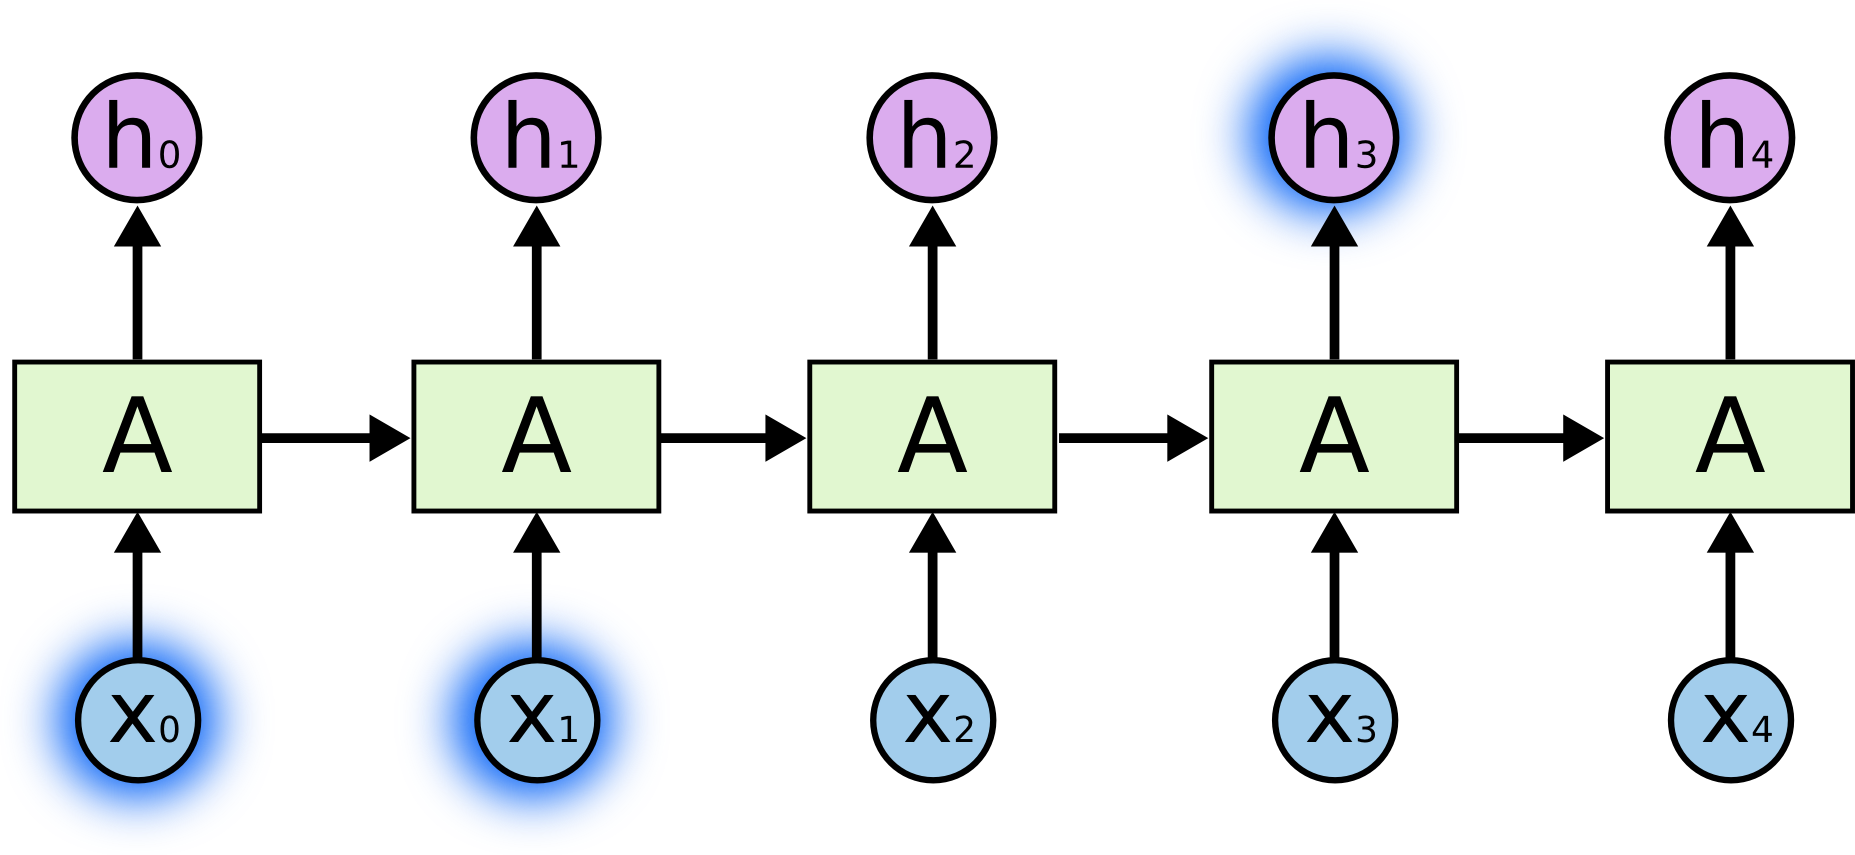

Nhưng trong nhiều tình huống ta buộc phải sử dụng nhiều ngữ cảnh hơn để suy luận. Ví dụ, dự đoán chữ cuối cùng trong đoạn: “I grew up in France… I speak fluent French.”. Rõ ràng là các thông tin gần (”I speak fluent”) chỉ cho phép ta biết được đằng sau nó sẽ là tên của một ngôn ngữ nào đó, còn không thể nào biết được đó là tiếng gì. Muốn biết là tiếng gì, thì ta cần phải có thêm ngữ cảnh “I grew up in France” nữa mới có thể suy luận được. Rõ ràng là khoảng cách thông tin lúc này có thể đã khá xa rồi.

Thật không may là với khoảng cách càng lớn dần thì RNN bắt đầu không thể nhớ và học được nữa.
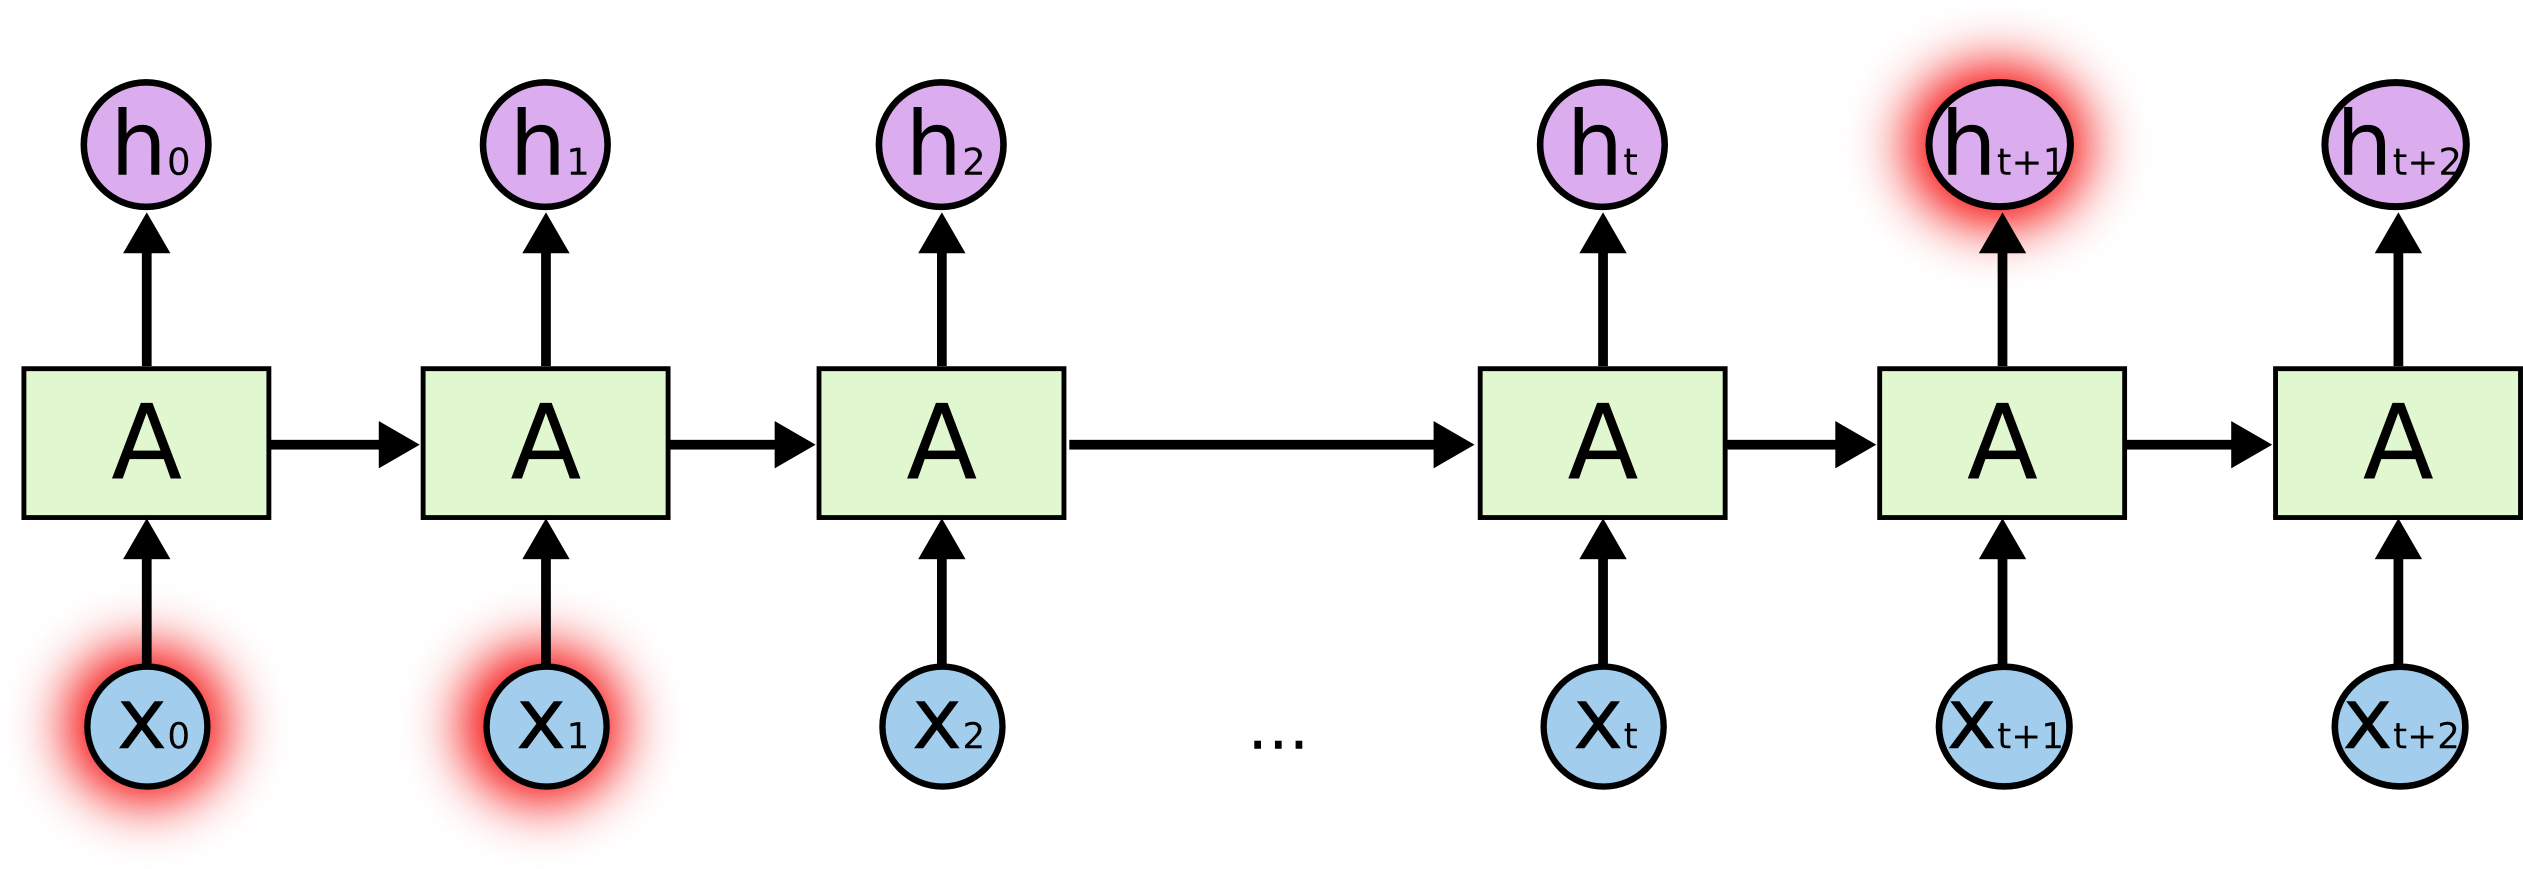

Về mặt lý thuyết, rõ ràng là RNN có khả năng xử lý các phụ thuộc xa (long-term dependencies). Chúng ta có thể xem xét và cài đặt các tham số sao cho khéo là có thể giải quyết được vấn đề này. Tuy nhiên, đáng tiếc trong thực tế RNN có vẻ không thể học được các tham số đó. Vấn đề này đã được khám phá khá sâu bởi Hochreiter (1991) [tiếng Đức] và Bengio, et al. (1994), trong các bài báo của mình, họ đã tìm được nhưng lý do căn bản để giải thích tại sao RNN không thể học được.

Tuy nhiên, rất cám ơn là LSTM không vấp phải vấn đề đó!

## 2. Mạng LSTM

Mạng bộ nhớ dài-ngắn (Long Short Term Memory networks), thường được gọi là LSTM - là một dạng đặc biệt của RNN, nó có khả năng học được các phụ thuộc xa. LSTM được giới thiệu bởi Hochreiter & Schmidhuber (1997), và sau đó đã được cải tiến và phổ biến bởi rất nhiều người trong ngành. Chúng hoạt động cực kì hiệu quả trên nhiều bài toán khác nhau nên dần đã trở nên phổ biến như hiện nay.

LSTM được thiết kế để tránh được vấn đề phụ thuộc xa (long-term dependency). Việc nhớ thông tin trong suốt thời gian dài là đặc tính mặc định của chúng, chứ ta không cần phải huấn luyện nó để có thể nhớ được. Tức là ngay nội tại của nó đã có thể ghi nhớ được mà không cần bất kì can thiệp nào.

Mọi mạng hồi quy đều có dạng là một chuỗi các mô-đun lặp đi lặp lại của mạng nơ-ron. Với mạng RNN chuẩn, các mô-dun này có cấu trúc rất đơn giản, thường là một tầng 
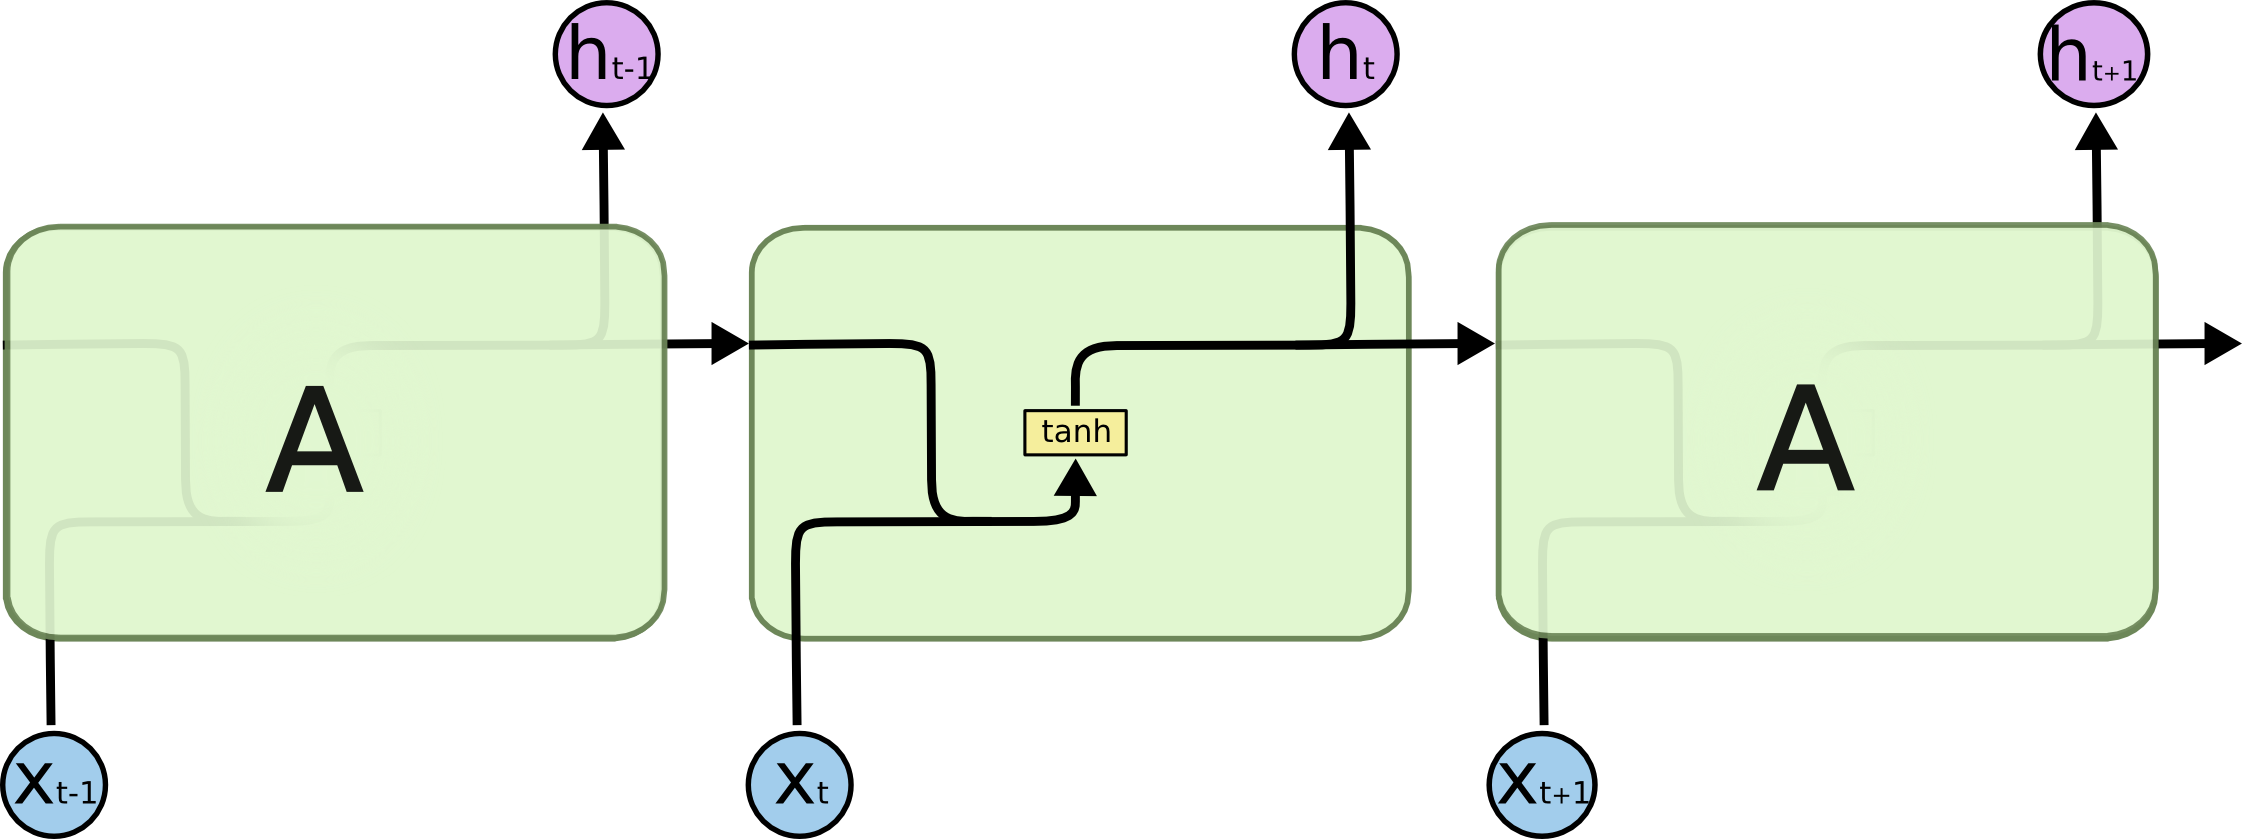

LSTM cũng có kiến trúc dạng chuỗi như vậy, nhưng các mô-đun trong nó có cấu trúc khác với mạng RNN chuẩn. Thay vì chỉ có một tầng mạng nơ-ron, chúng có tới 4 tầng tương tác với nhau một cách rất đặc biệt.

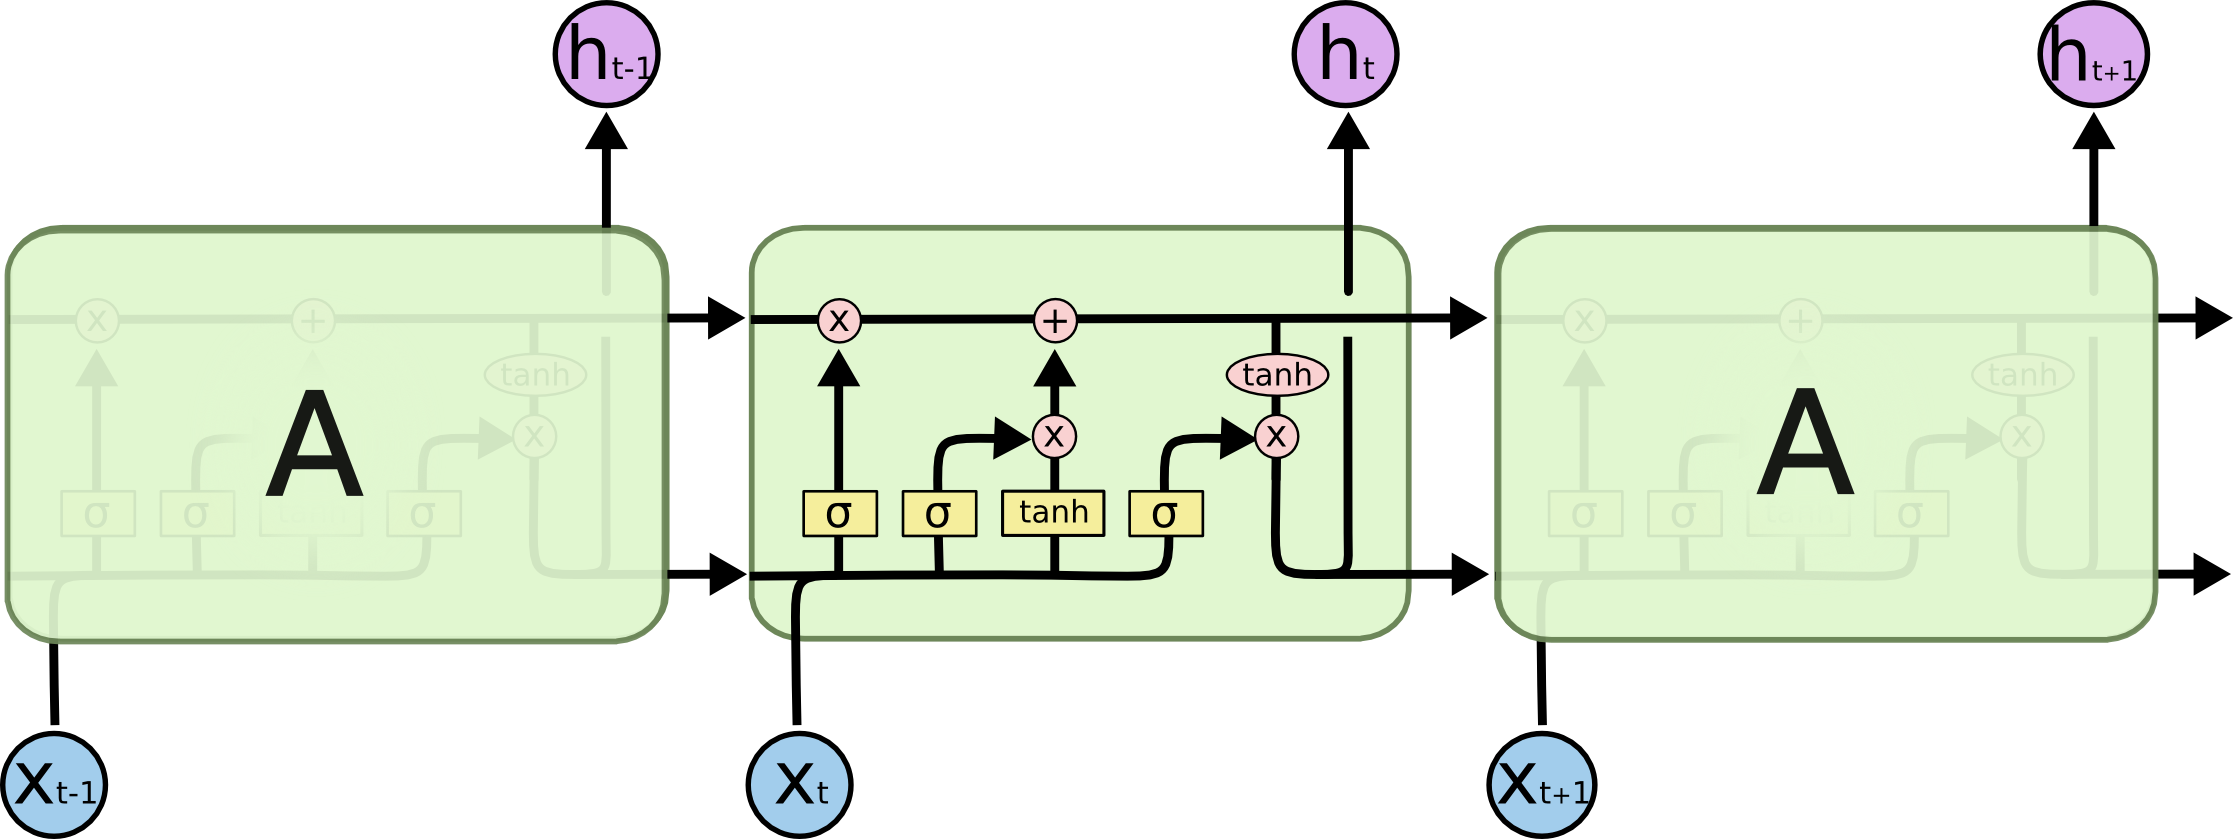

Giờ thì đừng hoang mang về chi tiết bên trong chúng ngay, chúng ta sẽ khám phá chúng chi tiết chúng ở bước sau. Điều bạn cần làm bây giờ là làm hãy làm quen với các kí hiệu mà ta sẽ sử dụng ở dưới đây:
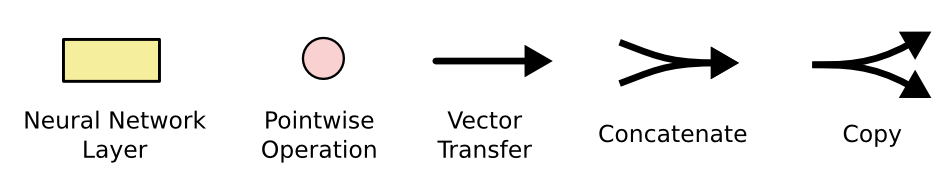

Ở sơ đồ trên, mỗi một đường mang một véc-tơ từ đầu ra của một nút tới đầu vào của một nút khác. Các hình trong màu hồng biểu diễn các phép toán như phép cộng véc-tơ chẳng hạn, còn các ô màu vàng được sử dụng để học trong các từng mạng nơ-ron. Các đường hợp nhau kí hiệu việc kết hợp, còn các đường rẽ nhánh ám chỉ nội dung của nó được sao chép và chuyển tới các nơi khác nhau.

### 2.1 Ý tưởng cốt lõi của LSTM
Chìa khóa của LSTM là trạng thái tế bào (cell state) - chính đường chạy thông ngang phía trên của sơ đồ hình vẽ.

Trạng thái tế bào là một dạng giống như băng truyền. Nó chạy xuyên suốt tất cả các mắt xích (các nút mạng) và chỉ tương tác tuyến tính đôi chút. Vì vậy mà các thông tin có thể dễ dàng truyền đi thông suốt mà không sợ bị thay đổi.

LSTM có khả năng bỏ đi hoặc thêm vào các thông tin cần thiết cho trạng thái tế báo, chúng được điều chỉnh cẩn thận bởi các nhóm được gọi là cổng (gate).

Các cổng là nơi sàng lọc thông tin đi qua nó, chúng được kết hợp bởi một tầng mạng sigmoid và một phép nhân.
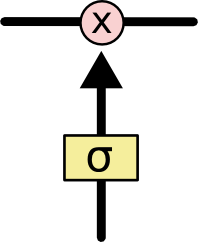

Tầng sigmoid sẽ cho đầu ra là một số trong khoản [0,1], mô tả có bao nhiêu thông tin có thể được thông qua. Khi đầu ra là 0 thì có nghĩa là không cho thông tin nào qua cả, còn khi là 1 thì có nghĩa là cho tất cả các thông tin đi qua nó.

Một LSTM gồm có 3 cổng như vậy để duy trì và điều hành trạng thái của tế bào.
### 3.2 Bên trong LSTM
Bước đầu tiên của LSTM là quyết định xem thông tin nào cần bỏ đi từ trạng thái tế bào. Quyết định này được đưa ra bởi tầng sigmoid - gọi là “tầng cổng quên” (*forget gate layer*). Nó sẽ lấy đầu vào là $h_{t-1}$ và $x_t$, rồi đưa ra kết quả là một số trong khoảng $[0, 1]$ cho mỗi phần tử trong trạng thái tế bào $C_{t-1}$. 

Đầu ra là $1$ thể hiện rằng nó giữ toàn bộ thông tin lại, còn $0$ chỉ rằng toàn bộ thông tin sẽ bị bỏ đi.
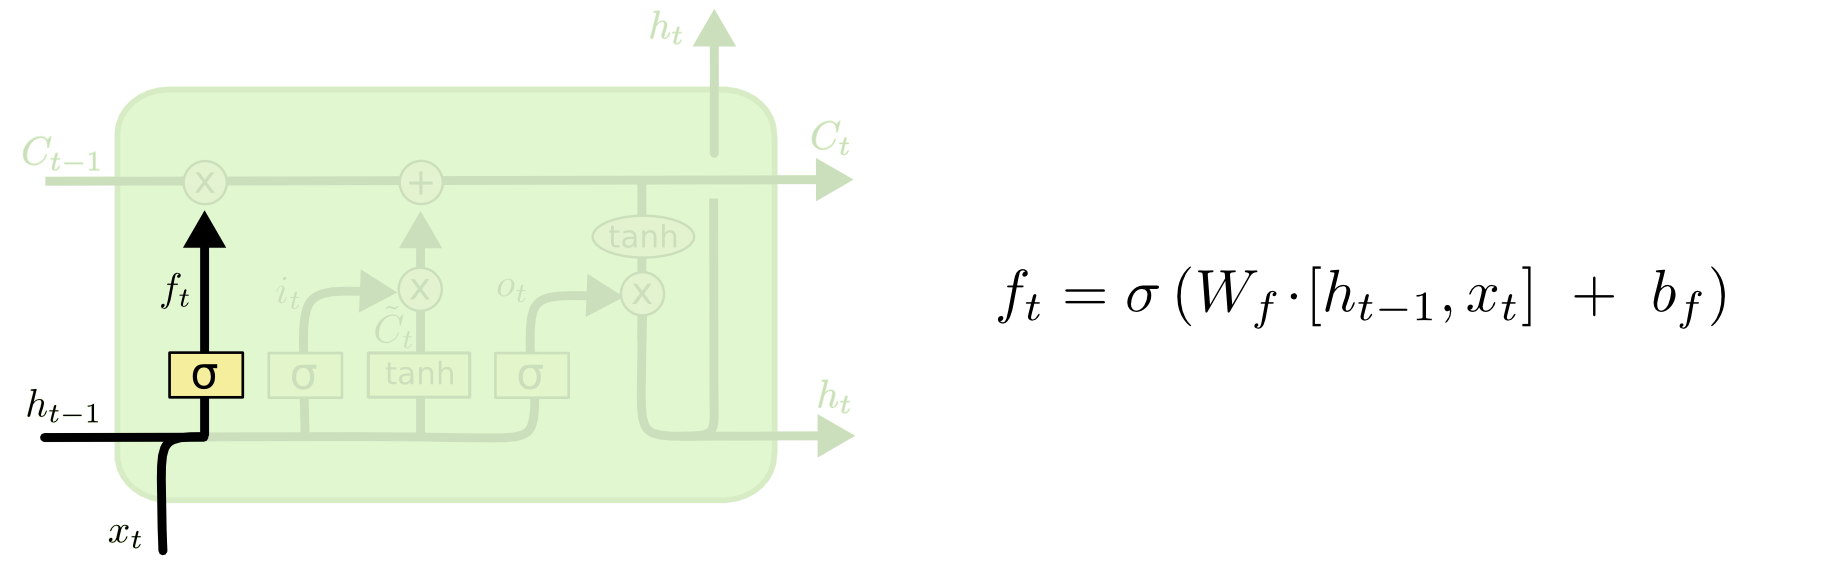

Bước tiếp theo là quyết định xem thông tin mới nào ta sẽ lưu vào trạng thái tế bào. Việc này gồm 2 phần:

1. Đầu tiên, sử dụng một tầng sigmoid được gọi là “tầng cổng vào” (*input gate layer*) để quyết định giá trị nào sẽ được cập nhật.
2. Tiếp theo, một tầng $tanh$ tạo ra một véc-tơ cho giá trị mới $\tilde{C}_t$ nhằm thêm vào trạng thái.

Trong bước tiếp theo, ta sẽ kết hợp 2 giá trị đó lại để tạo ra một cập nhật cho trạng thái.
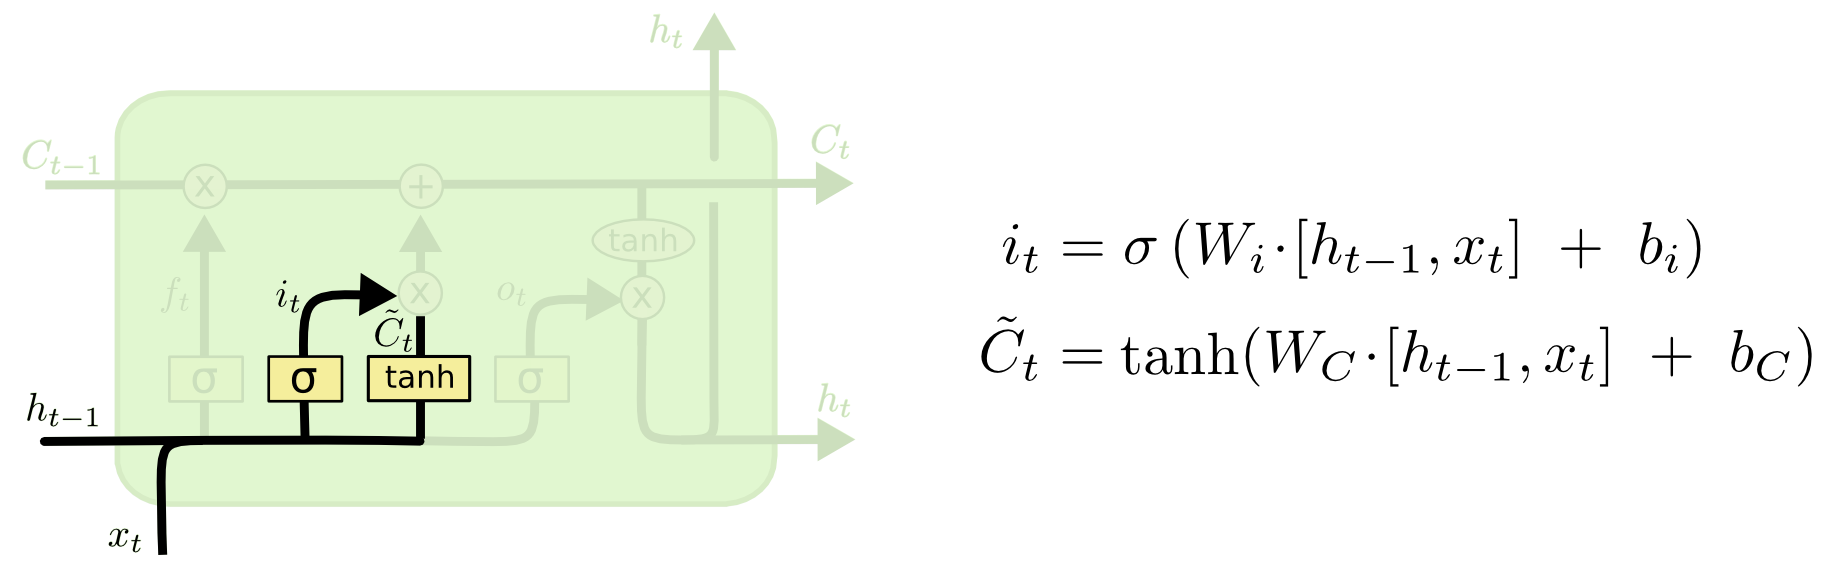

Giờ là lúc cập nhập trạng thái tế bào cũ $C_{t-1}$ thành trạng thái mới $C_t$. Ở các bước trước đó đã quyết định những việc cần làm, nên giờ ta chỉ cần thực hiện là xong.

Ta sẽ nhân trạng thái cũ với $f_t$ để bỏ đi những thông tin ta quyết định quên lúc trước. Sau đó cộng thêm $i_t * \tilde{C}_t$. Trạng thái mơi thu được này phụ thuộc vào việc ta quyết định cập nhập mỗi giá trị trạng thái ra sao.
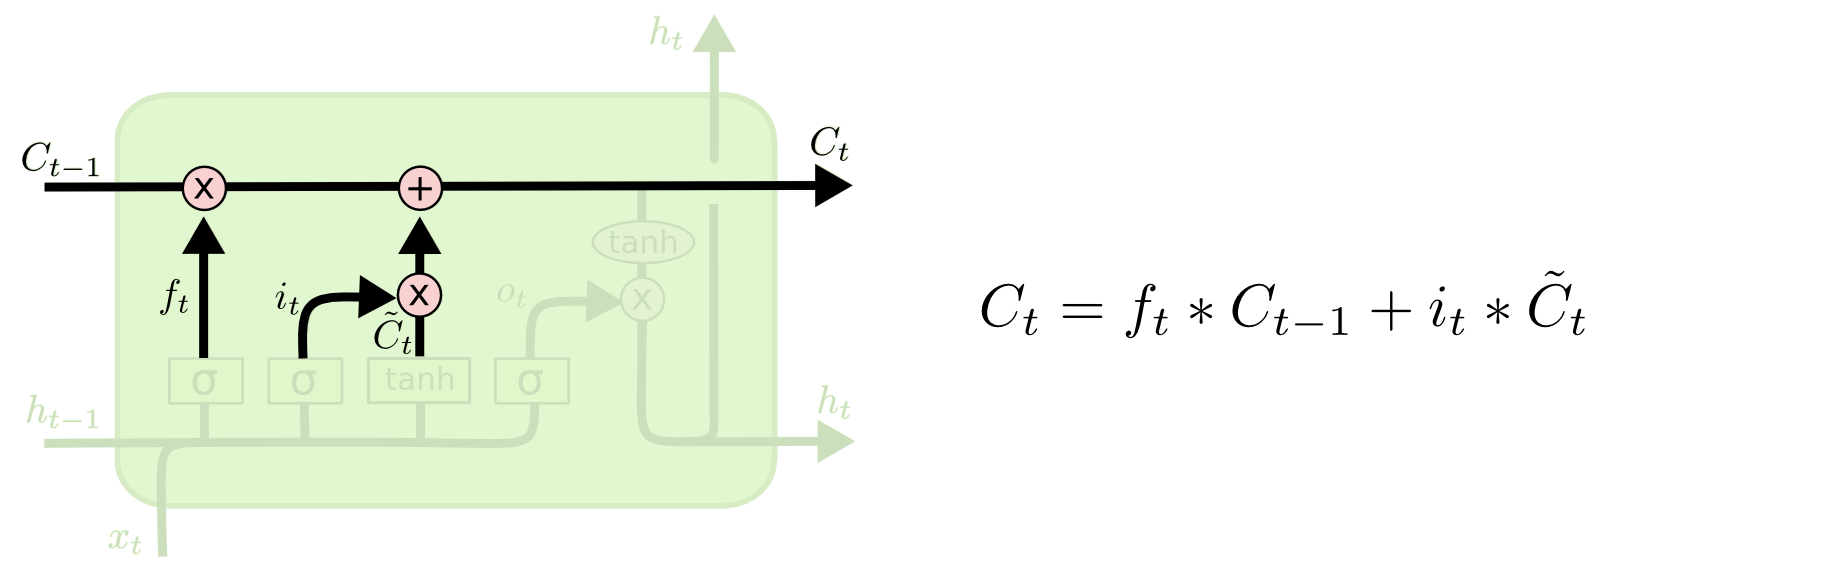

Cuối cùng, ta cần quyết định xem ta muốn đầu ra là gì. Giá trị đầu ra sẽ dựa vào trạng thái tế bào, nhưng sẽ được tiếp tục sàng lọc. Đầu tiên, ta chạy một tầng sigmoid để quyết định phần nào của trạng thái tế bào ta muốn xuất ra. Sau đó, ta đưa nó trạng thái tế bảo qua một hàm $tanh$ tanh để co giá trị nó về khoảng $[-1,1]$[−1,1], và nhân nó với đầu ra của cổng sigmoid để được giá trị đầu ra ta mong muốn.
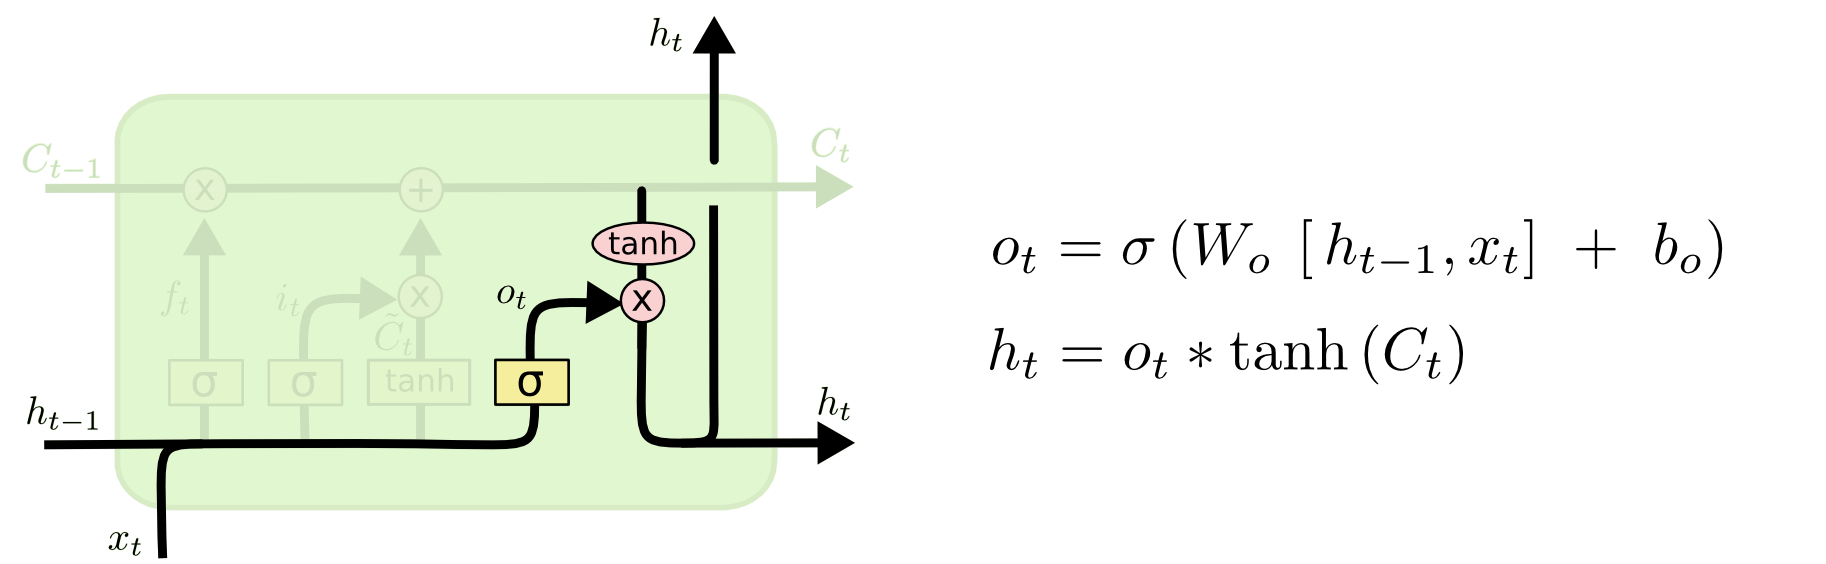
3. Các biến thể 

Những thứ ta vừa mô tả ở trên là một LSTM khá bình thường. Nhưng không phải tất cả các LTSM đều giống như vậy. Thực tế, các bài báo về LTSM đều sử dụng một phiên bản hơi khác so với mô hình LTSM chuẩn. Sự khác nhau không lớn, nhưng chúng giúp giải quyết phần nào đó trong cấu trúc của LTSM.

Một dạng LTSM phổ biến được giới thiệu bởi Gers & Schmidhuber (2000) được thêm các đường kết nối “peephole connections”, làm cho các tầng cổng nhận được giá trị đầu vào là trạng thái tế bào.
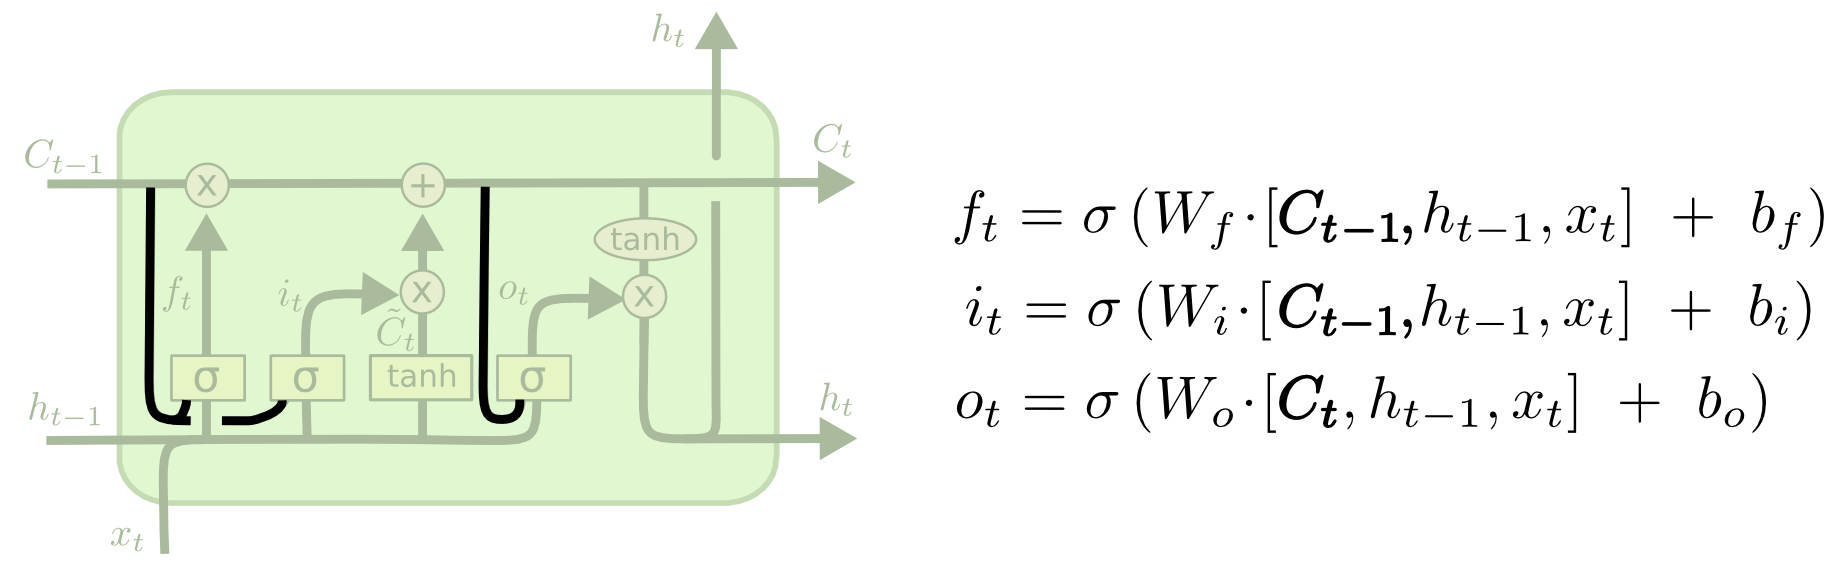

Hình trên mô tả các đường được thêm vào mọi cổng, nhưng cũng có những bài báo chỉ thêm cho một vài cổng mà thôi.

Một biến thể khác là nối 2 cổng loại trừ và đầu vào với nhau. Thay vì phân tách các quyết định thông tin loại trừ và thông tin mới thêm vào, ta sẽ quyết định chúng cùng với nhau luôn. Ta chỉ bỏ đi thông tin khi mà ta thay thế nó bằng thông tin mới đưa vào. Ta chỉ đưa thông tin mới vào khi ta bỏ thông tin cũ nào đó đi.
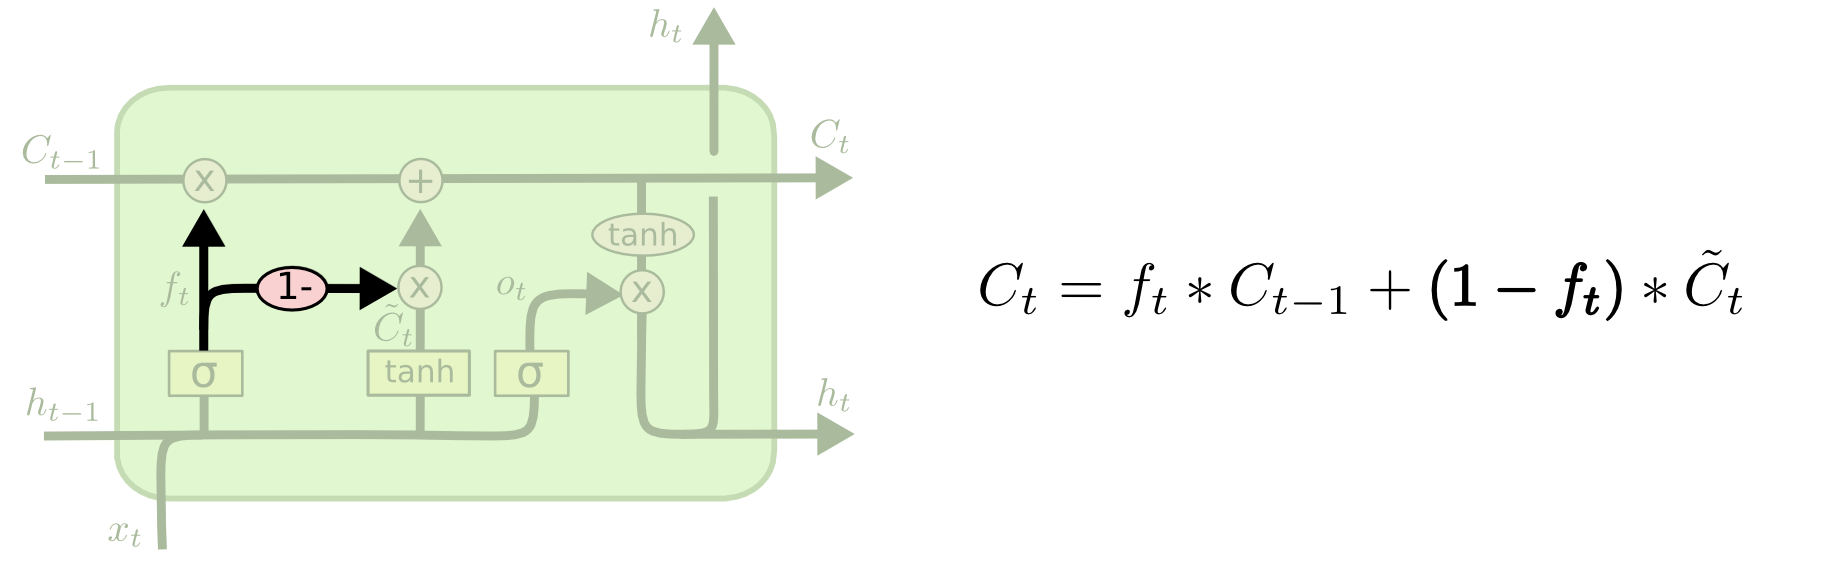

Một biến thể khá thú vị khác của LSTM là Gated Recurrent Unit, hay GRU được giới thiệu bởi Cho, et al. (2014). Nó kết hợp các cổng loại trừ và đầu vào thành một cổng “cổng cập nhập” (update gate). Nó cũng hợp trạng thái tế bào và trạng thái ẩn với nhau tạo ra một thay đổi khác. Kết quả là mô hình của ta sẽ đơn giản hơn mô hình LSTM chuẩn và ngày càng trở nên phổ biến.

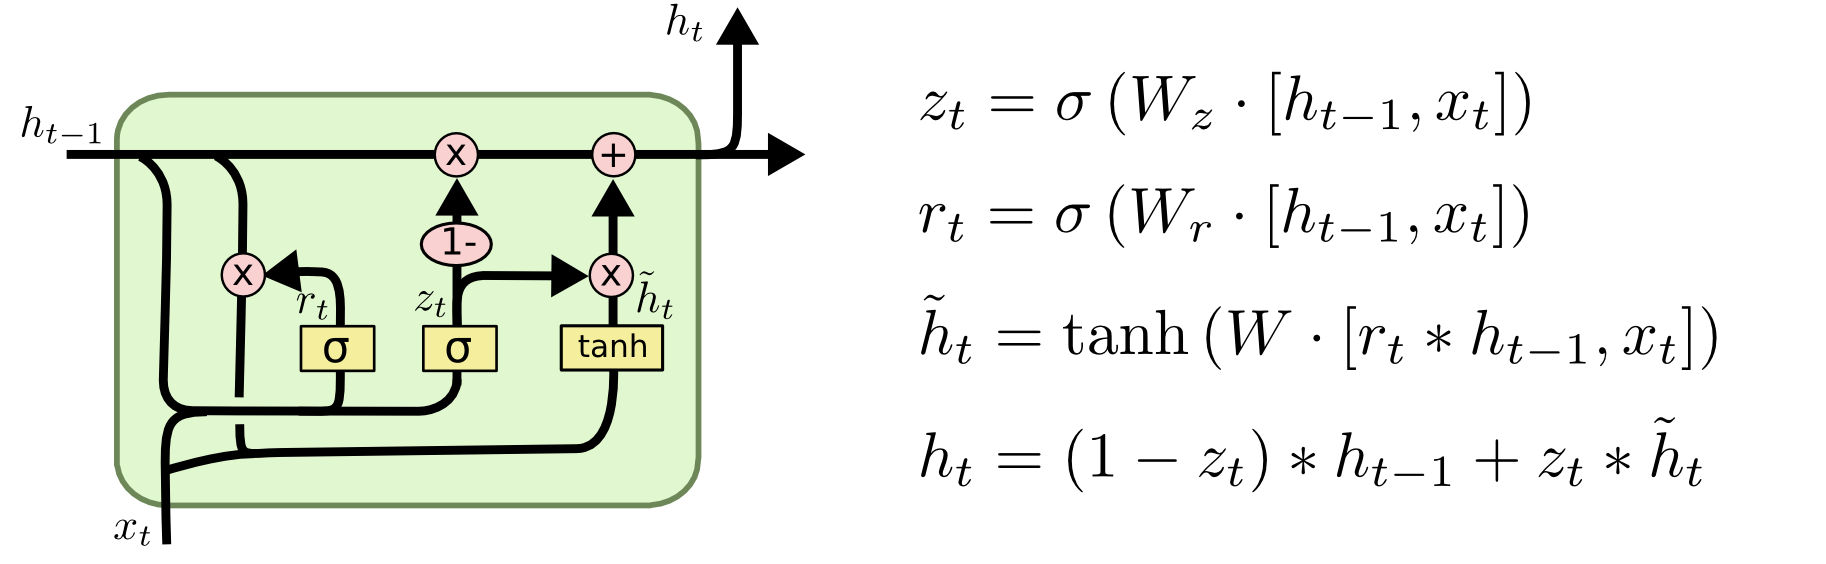

Trên đây chỉ là một vài biến thế được chú ý nhiều nhất thôi, thực tế có rất nhiều các biến thể khác nhau của LSTM như Depth Gated RNNs của Yao, et al. (2015). Cũng có những biến thể mà chiến lực xử lý phụ thuộc xa hoàn toàn khác như Clockwork RNNs của Koutnik, et al. (2014).






